<a href="https://colab.research.google.com/github/jaderdeandrade/AgendaCliente/blob/master/PUC_Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [ ]:
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## Visualização e exploração dos dados

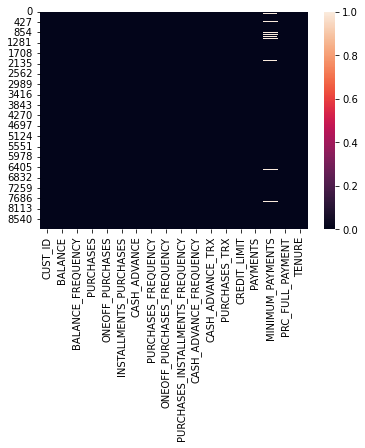

In [ ]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

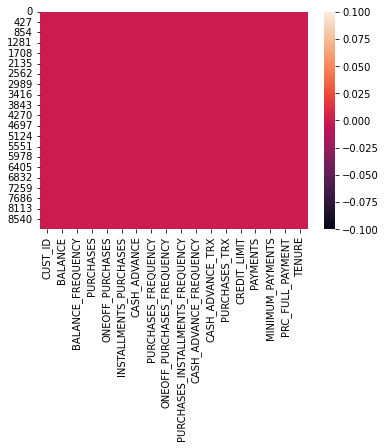

In [ ]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

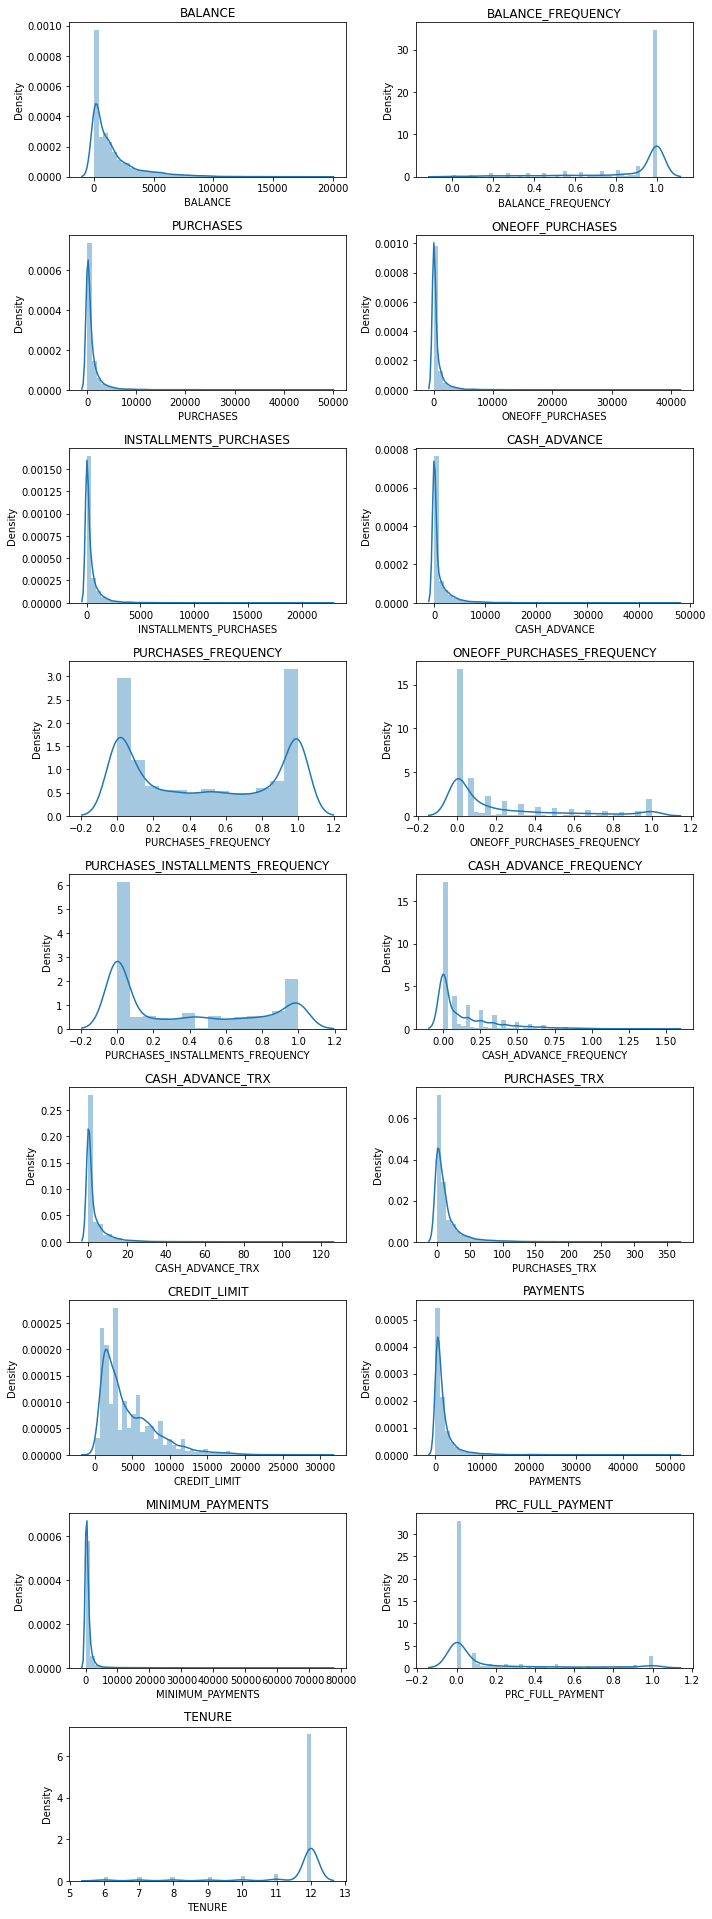

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 2, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [ ]:
correlations = creditcard_df.corr()

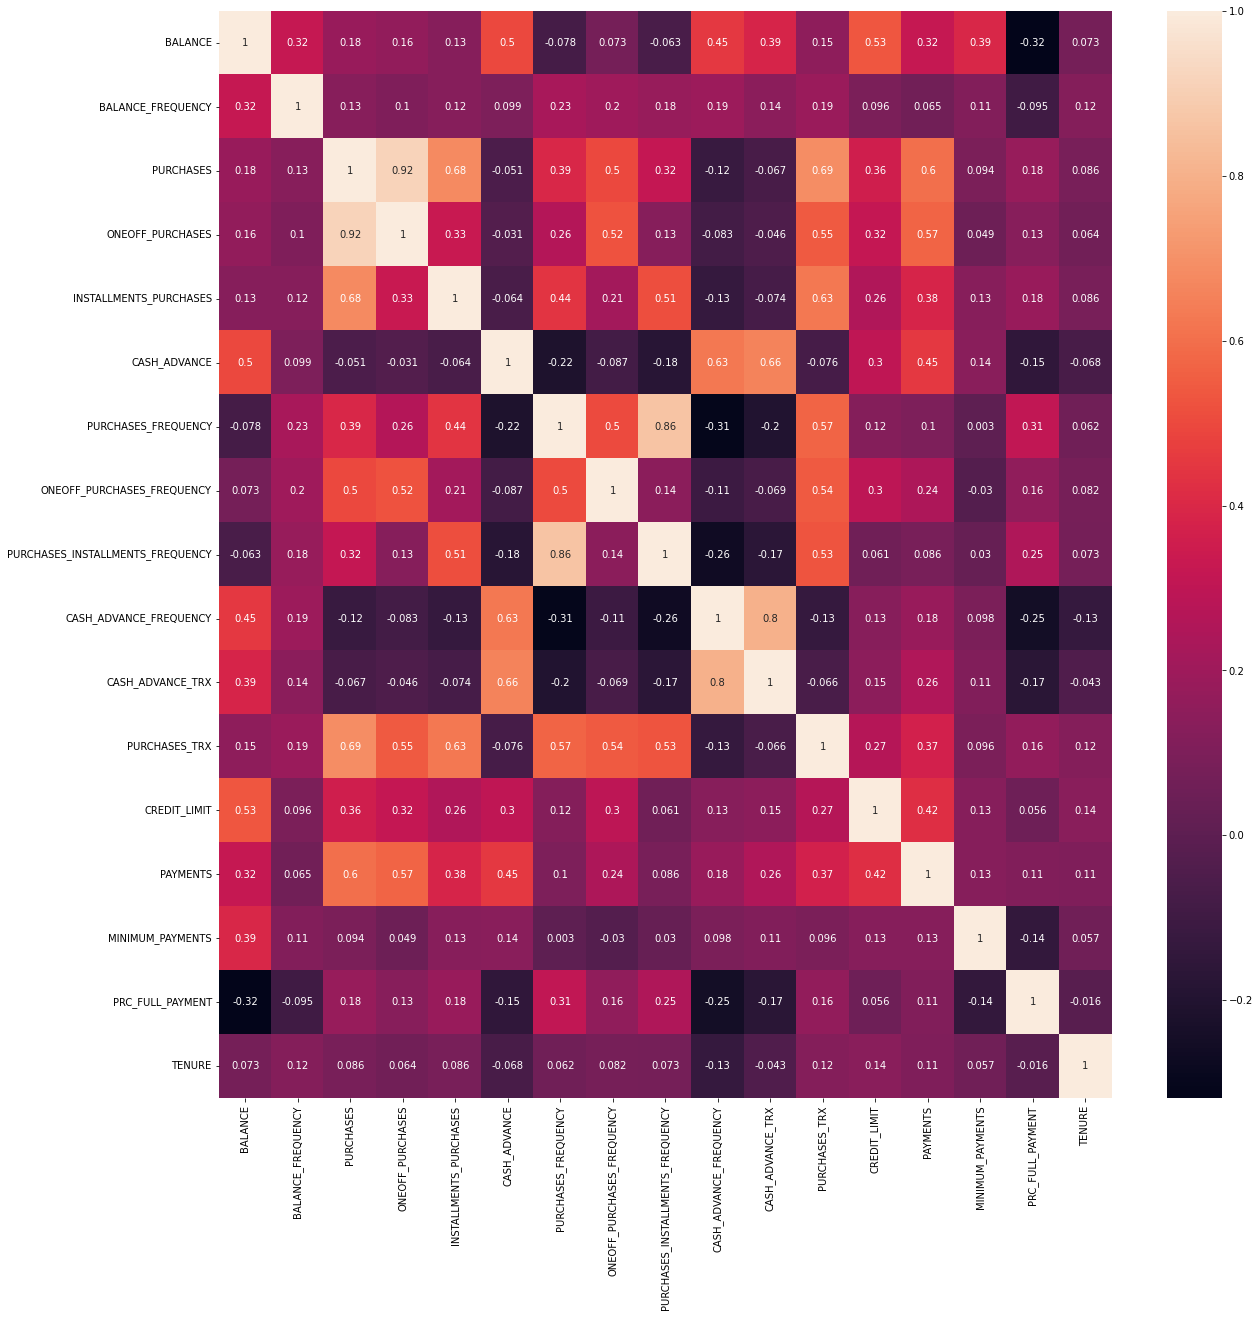

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [ ]:
print(wcss_1)

[152149.99999999983, 127785.00174150619, 111986.67194121204, 99073.93826774803, 91502.03129512371, 84852.67663769773, 79532.40237691798, 74509.44304069766, 69979.27405520662, 66470.05167866887, 63646.04836506894, 61381.15790950024, 59145.46507153375, 57500.44471703602, 55910.580065399074, 54563.778824677545, 53235.55964858559, 51743.09256357328, 50492.193506435615]


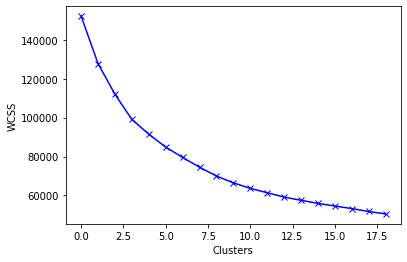

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([2, 0, 4, ..., 3, 3, 3], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 872, 1182, 2752,  624, 1122, 2015,  358,   25]))

In [ ]:
kmeans.cluster_centers_

array([[ 1.68344611e+00,  3.92881782e-01, -2.21105857e-01,
        -1.59096829e-01, -2.30580969e-01,  2.01009429e+00,
        -4.74634379e-01, -2.10302651e-01, -4.13898275e-01,
         1.91524832e+00,  1.92143928e+00, -2.69345591e-01,
         1.02756392e+00,  8.18156163e-01,  5.51842935e-01,
        -3.90381529e-01,  7.01809641e-02],
       [-7.01001465e-01, -2.13973346e+00, -3.10358066e-01,
        -2.34990639e-01, -3.02002975e-01, -3.22522194e-01,
        -5.54262413e-01, -4.42440773e-01, -4.39085877e-01,
        -5.21633654e-01, -3.76395640e-01, -4.19162018e-01,
        -1.74184969e-01, -2.01490253e-01, -2.56954151e-01,
         2.81920380e-01,  2.01369241e-01],
       [ 1.23358092e-02,  4.04099536e-01, -3.57062755e-01,
        -2.41814703e-01, -3.99903262e-01, -9.51112178e-02,
        -8.52828794e-01, -3.94840977e-01, -7.54249924e-01,
         1.02656108e-01, -2.89009827e-02, -4.81554476e-01,
        -3.03114746e-01, -2.50717239e-01, -1.17696966e-02,
        -4.55671372e-01,  2.7

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.683446,0.392882,-0.221106,-0.159097,-0.230581,2.010094,-0.474634,-0.210303,-0.413898,1.915248,1.921439,-0.269346,1.027564,0.818156,0.551843,-0.390382,0.070181
1,-0.701001,-2.139733,-0.310358,-0.234991,-0.302003,-0.322522,-0.554262,-0.442441,-0.439086,-0.521634,-0.376396,-0.419162,-0.174185,-0.201490,-0.256954,0.281920,0.201369
2,0.012336,0.404100,-0.357063,-0.241815,-0.399903,-0.095111,-0.852829,-0.394841,-0.754250,0.102656,-0.028901,-0.481554,-0.303115,-0.250717,-0.011770,-0.455671,0.273520
3,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
4,-0.136765,0.399921,0.535282,0.664172,0.045282,-0.331562,0.978531,1.903070,0.168494,-0.413992,-0.330318,0.616112,0.428106,0.141135,-0.158759,0.447649,0.268773
5,-0.361848,0.332722,-0.034628,-0.242394,0.363252,-0.362412,0.994366,-0.384161,1.206851,-0.473042,-0.359859,0.189870,-0.262235,-0.214423,-0.030113,0.314446,0.256103
6,1.044635,0.467595,2.475182,1.820048,2.508863,-0.155349,1.162779,1.563685,1.267221,-0.278814,-0.145341,3.113081,1.290382,1.436111,0.555879,0.246267,0.337720
7,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5068.425814,0.970341,530.808761,328.369220,202.556135,5194.132744,0.299857,0.139720,0.199944,0.518405,16.361239,8.014908,8233.147415,4101.625778,2150.253223,0.039535,11.611239
1,105.399451,0.370388,340.120042,202.401041,137.970102,302.527006,0.267898,0.070469,0.189933,0.030760,0.680203,4.291032,3860.693269,1149.849312,265.385733,0.236172,11.786802
2,1590.150773,0.972998,240.334753,191.074491,49.440087,779.418446,0.148069,0.084669,0.064679,0.155687,3.051599,2.740189,3391.593992,1007.342012,836.777761,0.020439,11.883358
3,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
4,1279.810158,0.972008,2146.842193,1694.826560,452.015633,283.570919,0.883082,0.770180,0.431401,0.052300,0.994652,30.024064,6052.074218,2141.716855,494.224337,0.284644,11.877005
5,811.318861,0.956089,929.221906,190.113697,739.551524,218.875625,0.889438,0.087855,0.844071,0.040484,0.793052,19.429280,3540.332606,1112.409809,794.029346,0.245685,11.860050
6,3738.793623,0.988040,6291.468603,3613.343464,2679.801117,653.097684,0.957030,0.668935,0.868063,0.079351,2.256983,92.089385,9189.385475,5890.543674,2159.658010,0.225744,11.969274
7,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


In [ ]:
labels, len(labels)

(array([2, 0, 4, ..., 3, 3, 3], dtype=int32), 8950)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


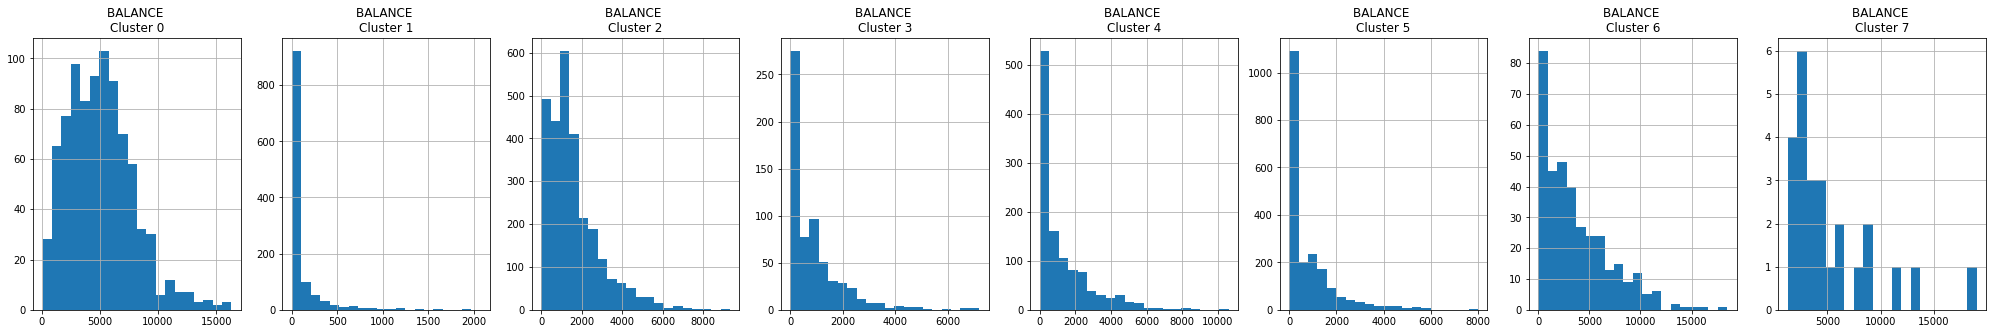

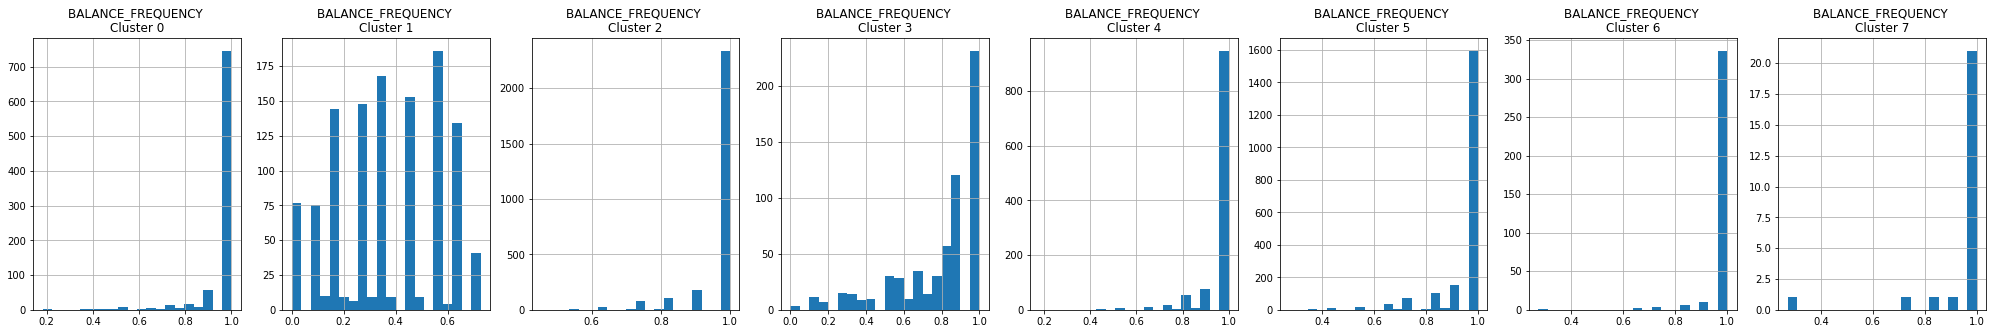

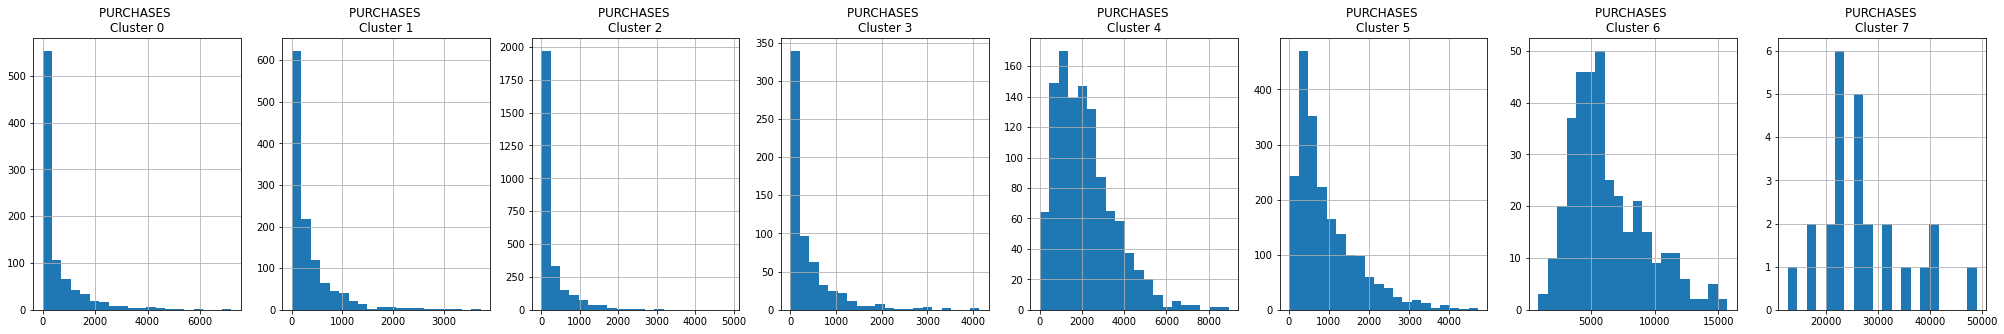

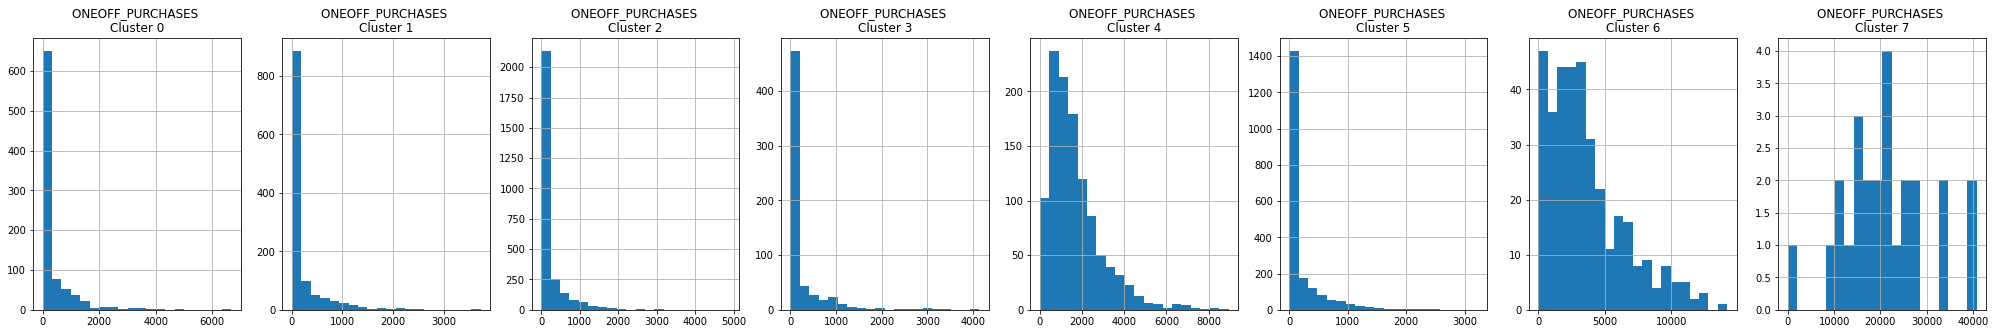

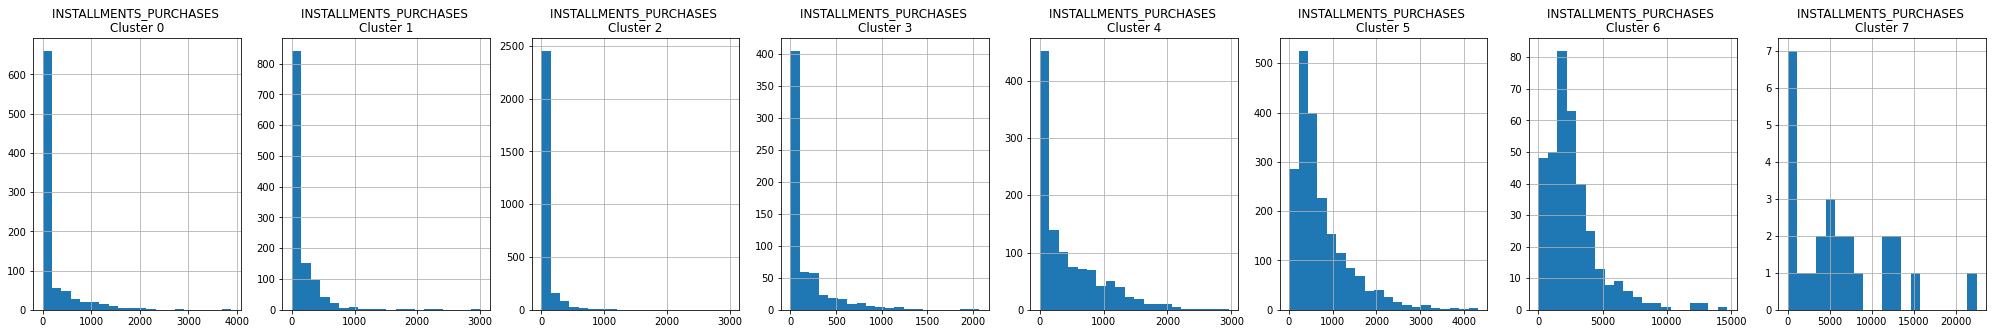

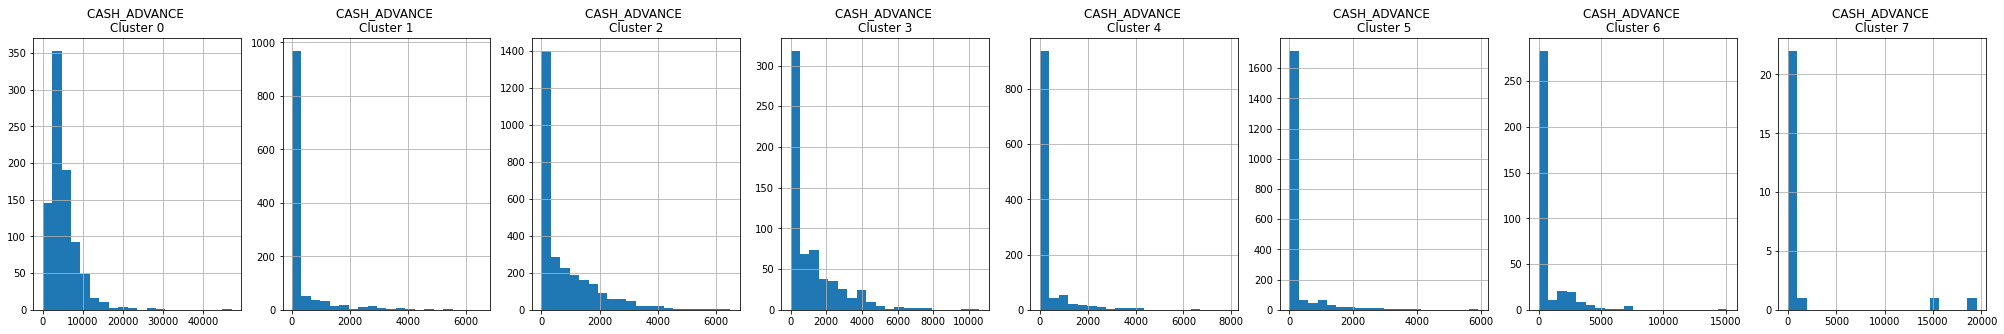

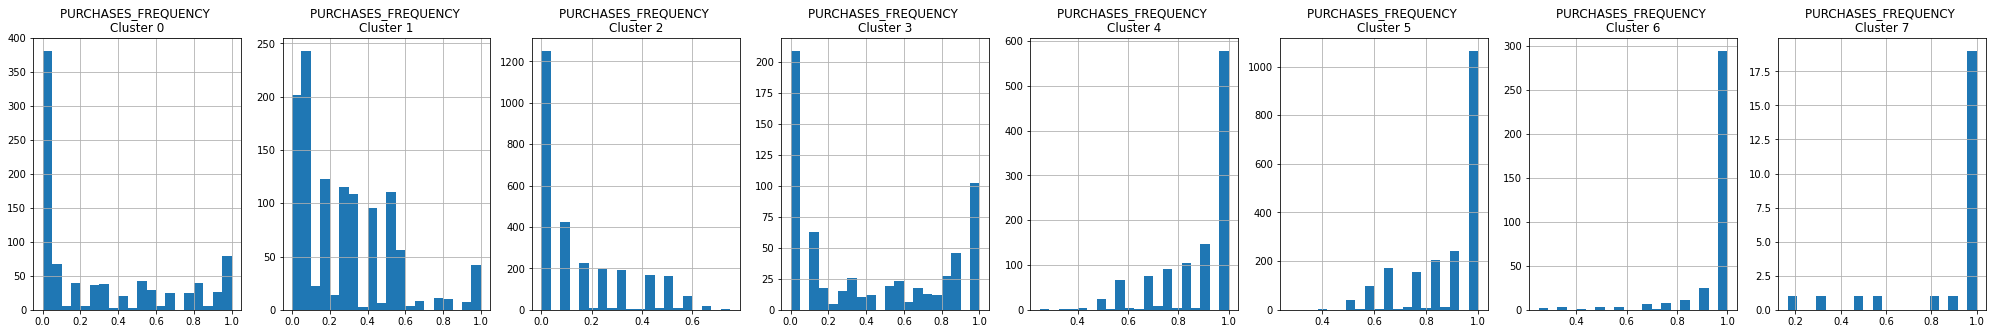

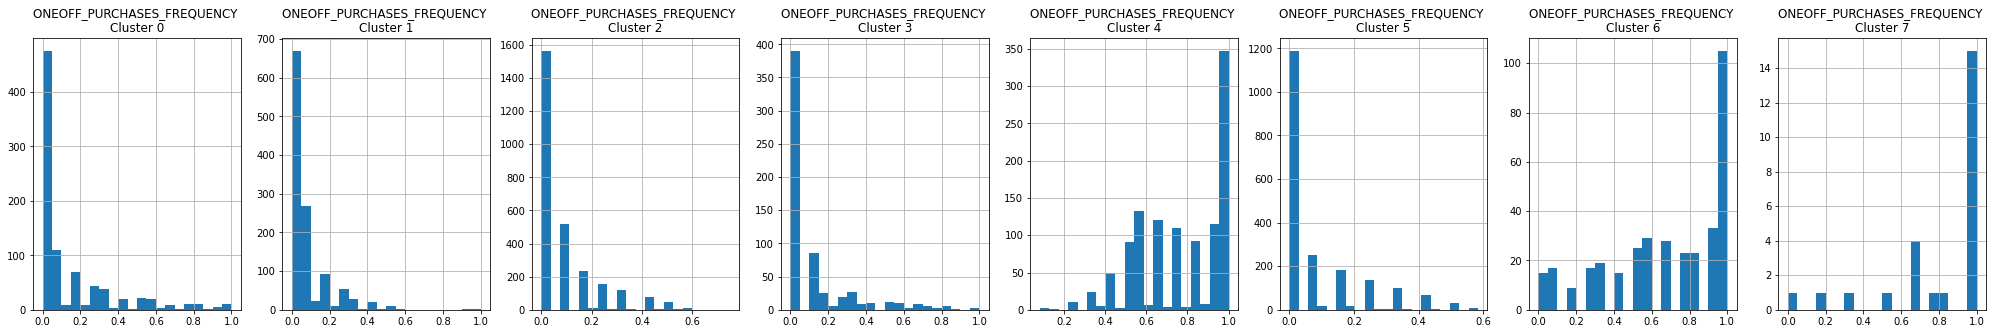

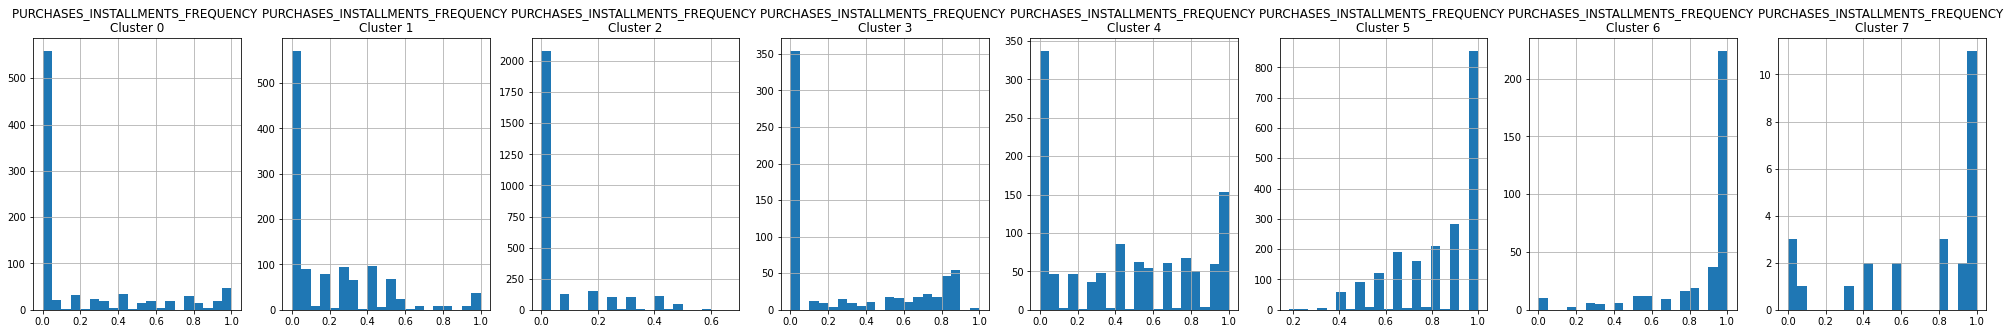

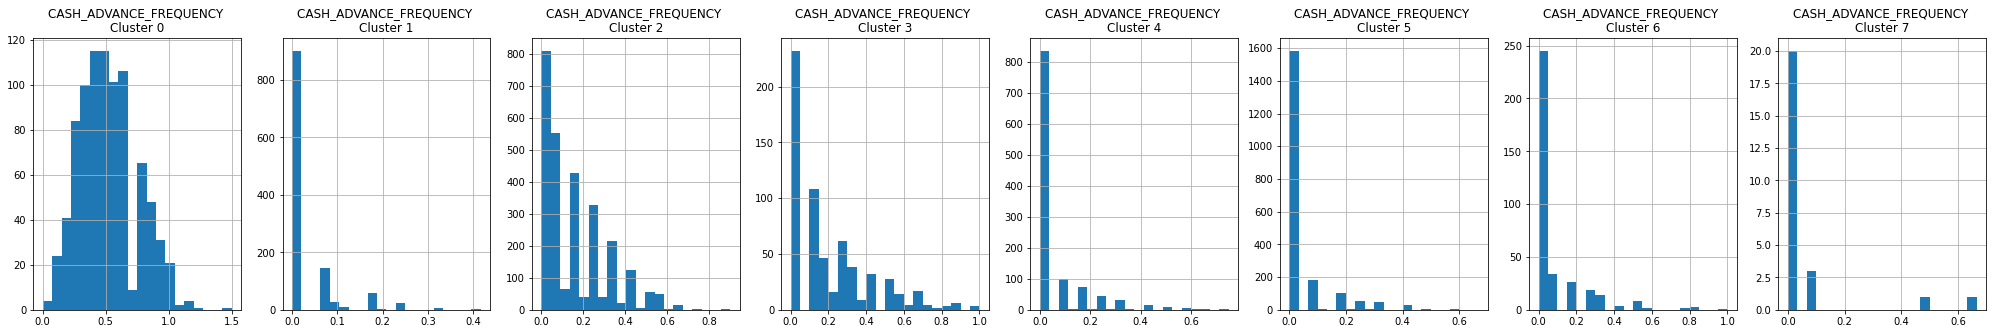

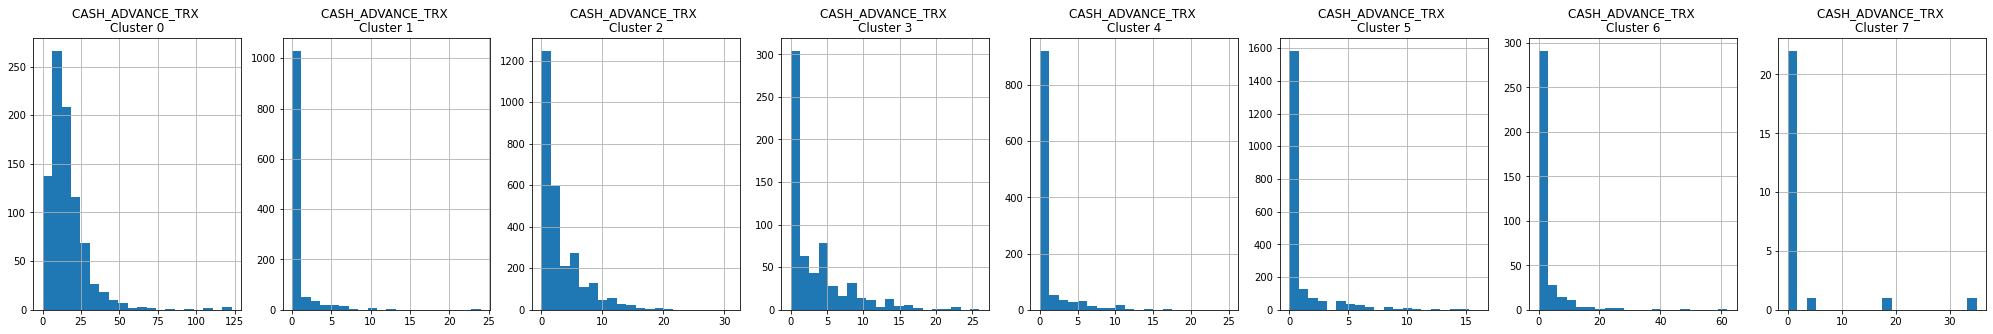

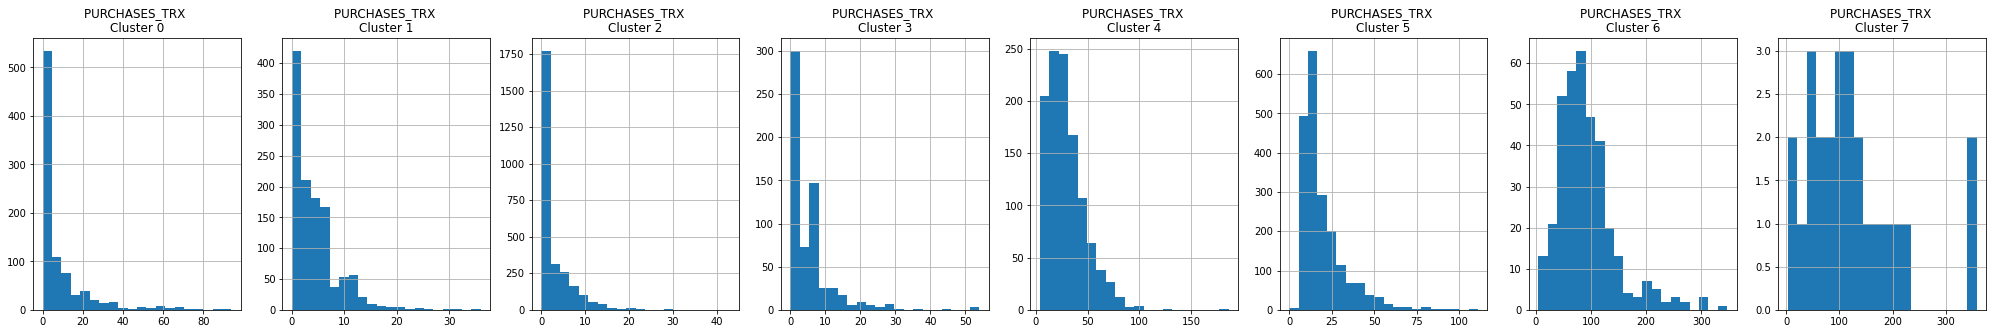

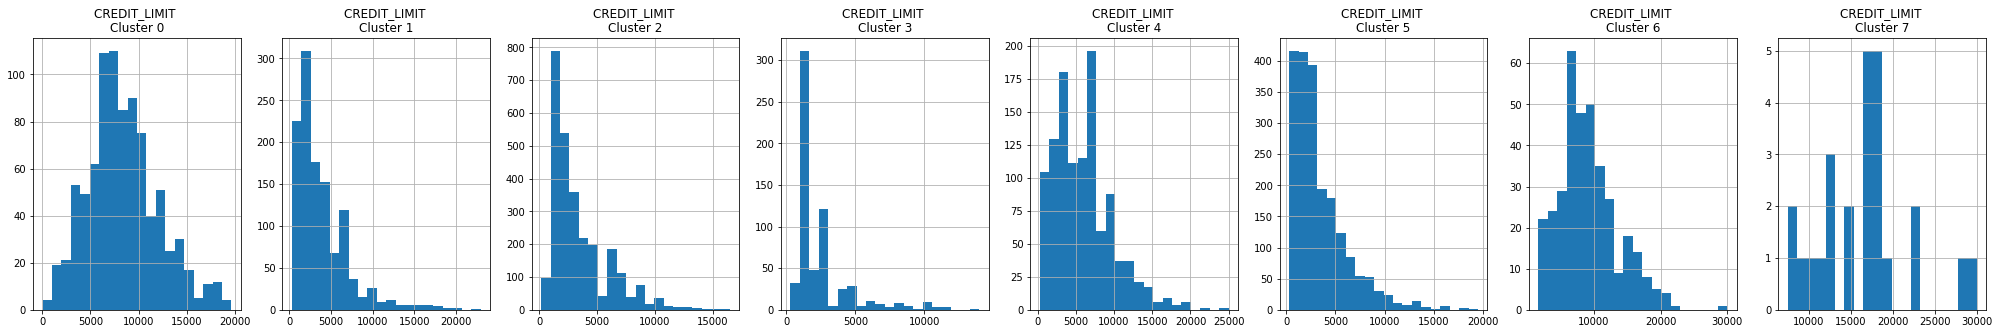

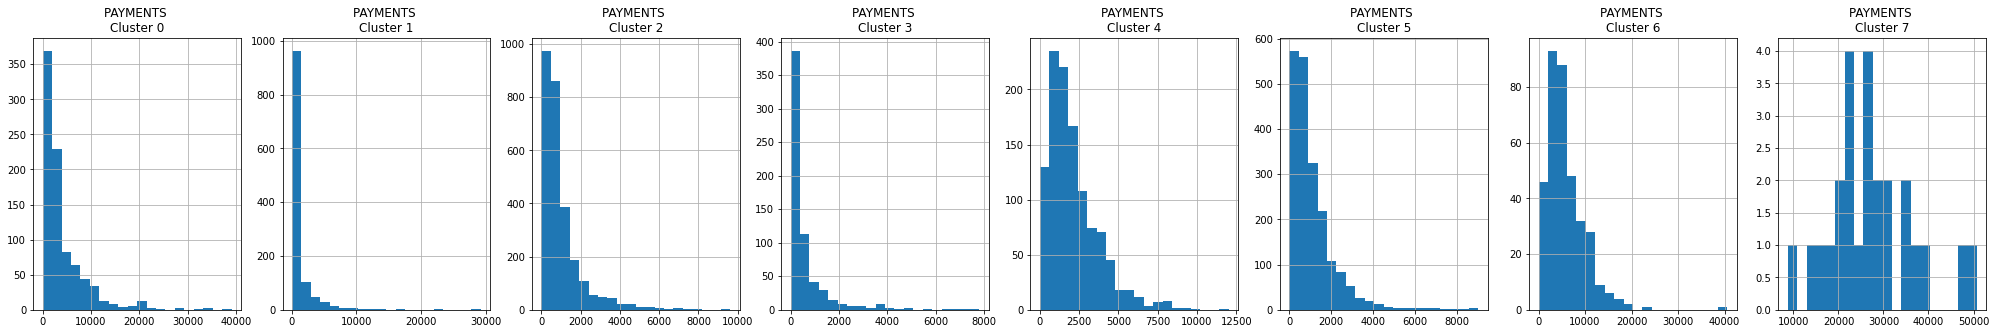

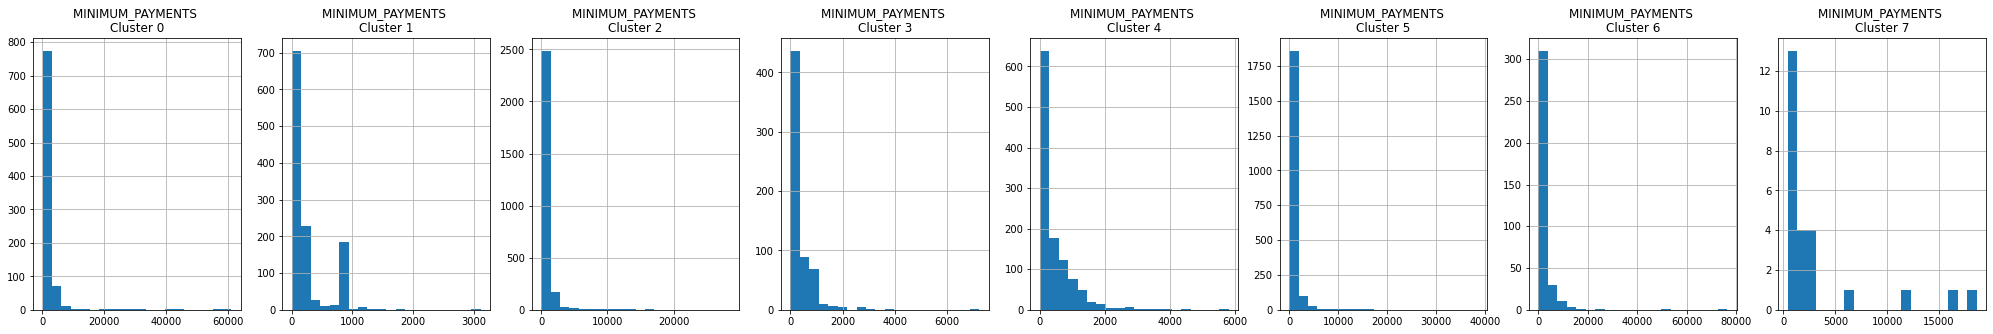

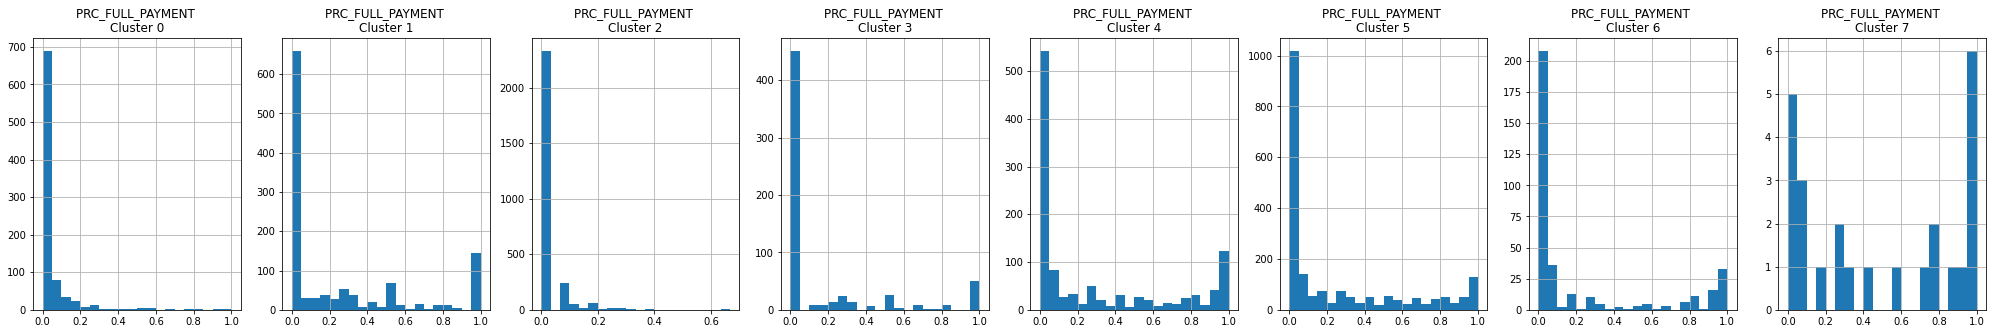

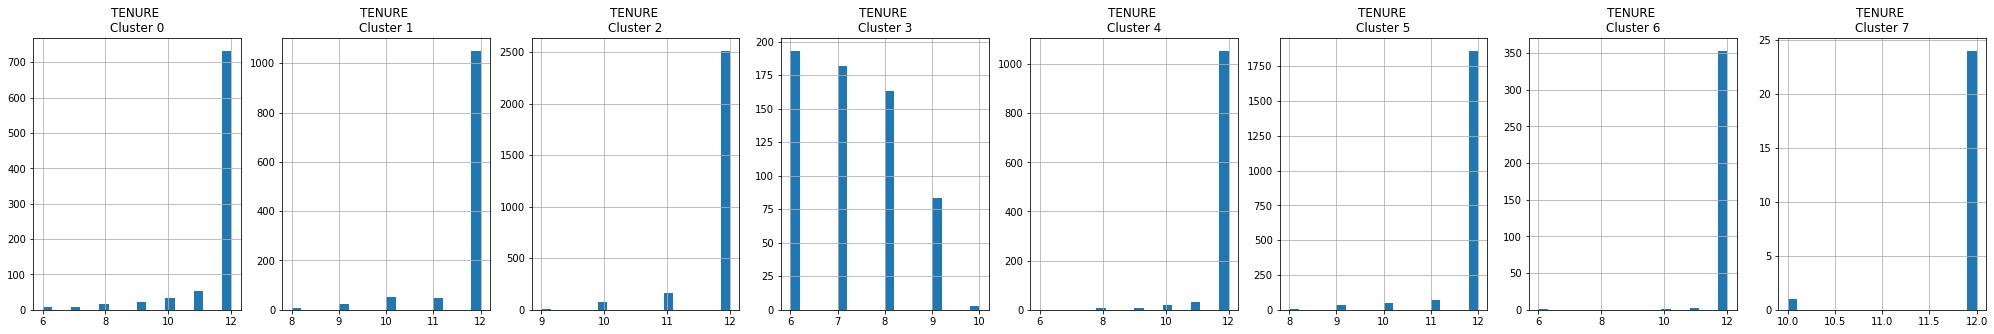

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6858,4338.877278,0.888889,0.00,0.00,0.00,5705.426498,0.000000,0.000000,0.000000,0.444444,19,0,6000.0,217.059511,10057.561920,0.000000,9,0
7838,2936.438250,1.000000,2177.32,1919.37,257.95,1935.422714,0.666667,0.416667,0.416667,0.416667,23,16,5000.0,1513.160603,2151.054928,0.000000,12,0
3210,10871.085180,1.000000,0.00,0.00,0.00,4822.559803,0.000000,0.000000,0.000000,0.166667,3,0,18000.0,2735.624602,2595.765441,0.000000,12,0
6538,5354.537940,1.000000,0.00,0.00,0.00,8504.909507,0.000000,0.000000,0.000000,0.916667,21,0,7500.0,6438.405866,1246.140550,0.000000,12,0
4018,3358.724054,1.000000,328.00,328.00,0.00,8416.854736,0.166667,0.166667,0.000000,0.583333,27,2,5000.0,6698.912435,1653.896679,0.166667,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
854,4419.302940,1.0,12551.95,10901.24,1650.71,14896.540510,1.0,0.666667,1.000000,0.500000,19,122,17000.0,31698.41902,1448.585054,0.416667,12,7
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12,7
1641,3454.094319,1.0,31299.35,19064.30,12235.05,0.000000,1.0,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12,7
1585,8809.504736,1.0,25378.36,20646.07,4732.29,0.000000,1.0,1.000000,1.000000,0.000000,0,136,14500.0,25825.32482,2921.628286,0.000000,12,7
1560,2774.249582,1.0,21802.60,21802.60,0.00,1771.824164,1.0,1.000000,0.000000,0.083333,4,72,13000.0,22350.29247,562.887574,0.916667,12,7


In [ ]:
credit_ordered.to_csv('cluster.csv')